In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, execute, BasicAer, QuantumRegister, ClassicalRegister, transpile
from qiskit.aqua.components.uncertainty_models import LogNormalDistribution

/home/sergirc/PhD/extra-env/lib/python3.7/site-packages/qiskit/__init__.py:56: RuntimeWarning: Could not import the Aer provider from the qiskit-aer package. Install qiskit-aer or check your installation.
  RuntimeWarning)


In [19]:
qu = 4

In [20]:
S0 = 2
K = 1.9
sig = 0.4
r = 0.05
T = 0.25

In [21]:
mu = ((r - 0.5 * sig ** 2) * T + np.log(S0)) #parameters for the log_normal distribution
sigma = sig * np.sqrt(T)
mean = np.exp(mu + sigma ** 2 / 2)
variance = (np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2)
stddev = np.sqrt(variance)

# lowest and highest value considered for the spot price; in between, an equidistant discretization is considered.
low = np.maximum(0, mean - 3 * stddev)
high = mean + 3 * stddev
#S = np.linspace(low, high, samples)

# construct circuit factory for uncertainty model
uncertainty_model = LogNormalDistribution(qu, mu=mu, sigma=sigma, low=low, high=high)

values = uncertainty_model.values
pdf = uncertainty_model.probabilities

qr = QuantumRegister(qu)
cr = ClassicalRegister(qu)
qc = QuantumCircuit(qr, cr)
uncertainty_model.build(qc, qr)

In [22]:
qc.decompose()

In [23]:
#qc.draw(output='mpl')

In [24]:
backend = BasicAer.get_backend('qasm_simulator')

In [25]:
qc_new = transpile(qc, optimization_level=1)

In [26]:
#qc_new.draw(output='mpl')

In [27]:
qc_new = transpile(qc, backend=backend, optimization_level=2)

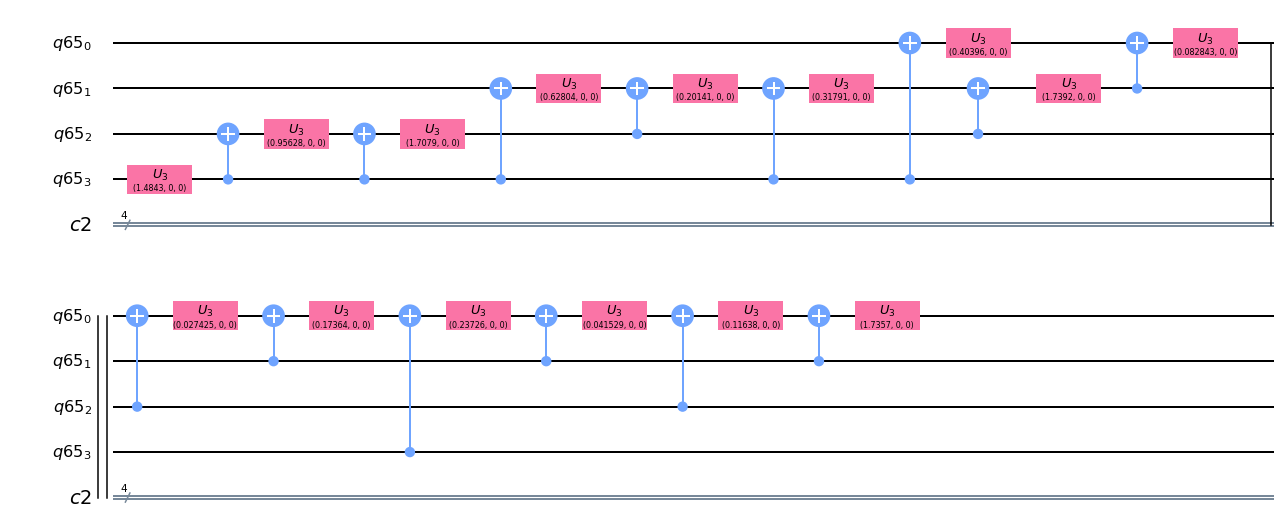

In [28]:
qc_new.draw(output='mpl')

In [15]:
qc_new = transpile(qc, backend=backend, optimization_level=3)

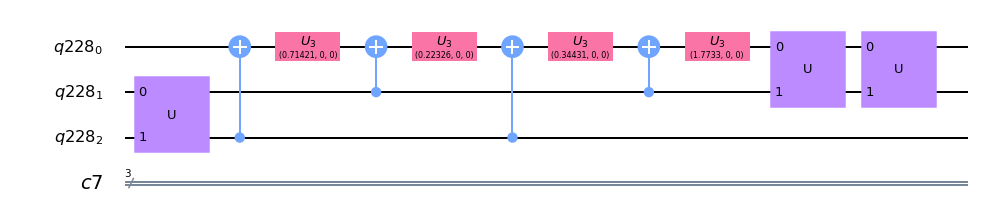

In [70]:
qc_new.draw(output='mpl')

In [43]:
qc_qasm = qc.qasm()

In [25]:
print(qc_qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q24[3];
creg c1[3];
u3(1.47960209971852,0,0) q24[2];
u1(0) q24[2];
cx q24[2],q24[1];
u3(1.06857779083320,0,0) q24[1];
cx q24[2],q24[1];
u3(1.74556389680811,0,0) q24[1];
cx q24[2],q24[1];
u1(0) q24[1];
cx q24[2],q24[1];
u1(0) q24[1];
cx q24[2],q24[0];
u3(0.714210754337920,0,0) q24[0];
cx q24[1],q24[0];
u3(0.223255296062390,0,0) q24[0];
cx q24[1],q24[0];
cx q24[2],q24[0];
cx q24[1],q24[0];
u3(0.344313816425615,0,0) q24[0];
cx q24[1],q24[0];
u3(1.77325189790372,0,0) q24[0];
cx q24[2],q24[0];
u1(0) q24[0];
cx q24[1],q24[0];
u1(0) q24[0];
cx q24[1],q24[0];
cx q24[2],q24[0];
cx q24[1],q24[0];
u1(0) q24[0];
cx q24[1],q24[0];
u1(0) q24[0];



In [24]:
print(qc_qasm.lines())

AttributeError: 'str' object has no attribute 'lines'

In [79]:
qu = 10

CNOTs = 0

for i in range(1,qu):
    CNOTs+=(2**(1+i))*(qu-i)
    
single = 0

for i in range(qu):
    single+=(2**(i))

In [80]:
print('For {} qubits - binary'.format(qu))

print('CNOT gates needed: {}'.format(CNOTs))

print('Single qubit gates needed: {}'.format(2*single))

For 10 qubits - binary
CNOT gates needed: 4052
Single qubit gates needed: 2046


In [81]:
qu = 2**qu

CNOTs = (qu-1)

single = 1

In [83]:
print('For {} qubits - unary'.format(qu))

print('CNOT gates needed: {}'.format(CNOTs))

print('Single qubit gates needed: {}'.format(single))

For 1024 qubits - unary
CNOT gates needed: 1023
Single qubit gates needed: 1
